Importing required libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Calling Cryptowatch API for pulling data

In [2]:
def get_usd_price(symbol, exchange, start_date="2021-08-28"):
    url='https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    response= requests.get(url, params={'periods' : '3600', 'after' : str(int(pd.Timestamp(start_date).timestamp()))})
    response.raise_for_status()
    data=response.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
def get_eur_price(symbol, exchange, start_date="2021-08-28"):
    url='https://api.cryptowat.ch/markets/{exchange}/{symbol}eur/ohlc'.format(symbol=symbol, exchange=exchange)
    response= requests.get(url, params={'periods' : '3600', 'after' : str(int(pd.Timestamp(start_date).timestamp()))})
    response.raise_for_status()
    data=response.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Defining the period of last 7 and last 30 days

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-10-12 20:24:34.967390')

In [5]:
last_thirty_days = (pd.Timestamp.now() - pd.offsets.Day(30))
last_thirty_days

Timestamp('2021-09-19 20:24:34.997356')

Calling the data pull functions

In [6]:
eth_usd = get_usd_price('eth', 'bitfinex', last_week)
btc_usd = get_usd_price('btc', 'bitfinex', last_week)

In [7]:
eth_eur = get_eur_price('eth', 'bitfinex', last_thirty_days)
btc_eur = get_eur_price('btc', 'bitfinex', last_thirty_days)

Describing the datasets

In [8]:
eth_usd.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-10-12 21:00:00,3466.822798,3490.9,3417.196699,3478.500000,2173.023544,7.495794e+06
2021-10-12 22:00:00,3479.000000,3487.0,3467.300000,3484.900000,214.635643,7.471023e+05
2021-10-12 23:00:00,3485.904241,3506.3,3477.100000,3500.100000,1246.533833,4.344454e+06
2021-10-13 00:00:00,3499.600000,3510.8,3485.400000,3491.000000,368.652242,1.290347e+06
2021-10-13 01:00:00,3489.800000,3531.2,3481.500000,3521.655621,365.337983,1.281812e+06


In [9]:
eth_usd.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,3763.025617,3783.321931,3743.955113,3765.516534,1066.296839,4.022192e+06
std,127.838485,126.675779,126.269051,126.254548,1124.247047,4.212885e+06
min,3426.784796,3442.300000,3414.200000,3426.752200,0.101000,3.484367e+02
25%,3735.265188,3760.325000,3715.075000,3741.875000,381.125982,1.425905e+06
50%,3803.742670,3818.950000,3779.750000,3804.830189,721.844866,2.727074e+06
75%,3850.150000,3865.775000,3834.325000,3850.150000,1269.411365,4.755229e+06
max,3957.000000,3973.200000,3928.300000,3956.800000,8081.790709,2.991269e+07


In [10]:
btc_usd.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-10-12 21:00:00,55343.000000,55587.000000,53837.519972,55366.0,1232.915321,6.748746e+07
2021-10-12 22:00:00,55372.000000,56069.000000,55083.000000,56069.0,281.996072,1.570096e+07
2021-10-12 23:00:00,56062.000000,56400.000000,56051.000000,56400.0,127.200316,7.147669e+06
2021-10-13 00:00:00,56398.701941,56529.655547,55925.000000,56009.0,97.168531,5.468220e+06
2021-10-13 01:00:00,56000.000000,56504.000000,55819.000000,56434.0,81.732246,4.596715e+06


In [11]:
btc_usd.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,59983.948606,60288.540757,59693.459880,60035.531216,285.256927,1.724764e+07
std,2430.505488,2433.815178,2429.966976,2426.628384,326.882801,2.002475e+07
min,54622.427345,54686.000000,53837.519972,54623.790793,0.000014,7.738523e-01
25%,57697.151270,58062.000000,57433.500000,57735.250000,105.843889,6.407898e+06
50%,60892.000000,61120.000000,60625.000000,60907.000000,185.943767,1.122423e+07
75%,61773.250000,62089.000000,61528.116160,61801.500000,317.074777,1.902337e+07
max,64263.931761,64421.000000,64068.176886,64263.000000,2154.211994,1.357121e+08


<AxesSubplot:xlabel='CloseTime'>

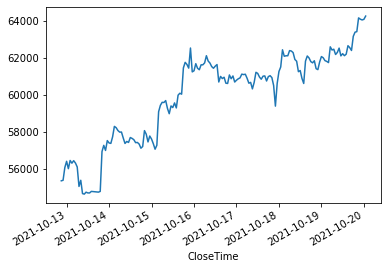

In [12]:
btc_usd['OpenPrice'].plot()

Plotting Relational Plot using Seaborn

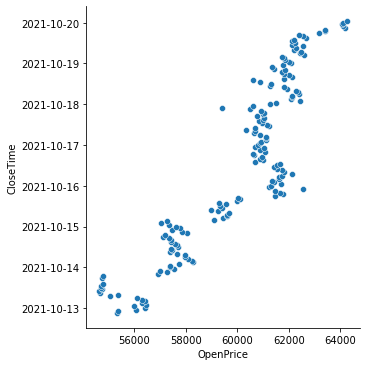

In [13]:
sns.relplot(y="CloseTime", x="OpenPrice", data=btc_usd)

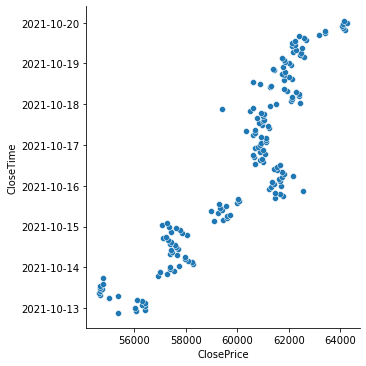

In [14]:
sns.relplot(y="CloseTime", x="ClosePrice", data=btc_usd)

Plotting Lineplot using Seaborn

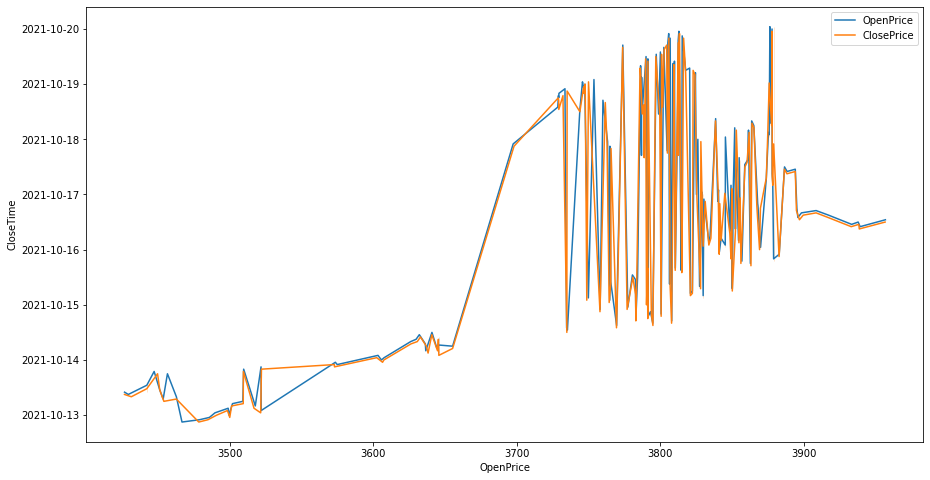

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x="OpenPrice", y="CloseTime", data=eth_usd)
sns.lineplot(x="ClosePrice", y="CloseTime", data=eth_usd);
plt.legend(labels=['OpenPrice','ClosePrice'])

Distribution Plots using Seaborn

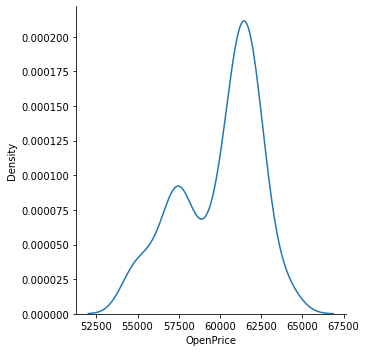

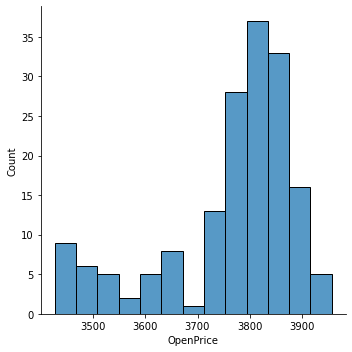

In [16]:
sns.displot(btc_usd['OpenPrice'], kind="kde")
sns.displot(eth_usd['OpenPrice']);

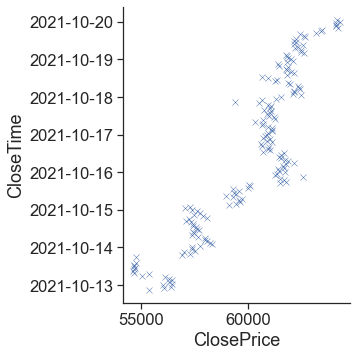

In [17]:
sns.set_theme(style="ticks",font_scale=1.5)
g = sns.relplot(data=btc_usd, x = "ClosePrice", y = "CloseTime", palette="crest", marker="x")

PairGrid and pairplots between OHLC(OpenPrice,HighPrice,LowPrice,ClosePrice) columns of Dataset

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000021F88BAF400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


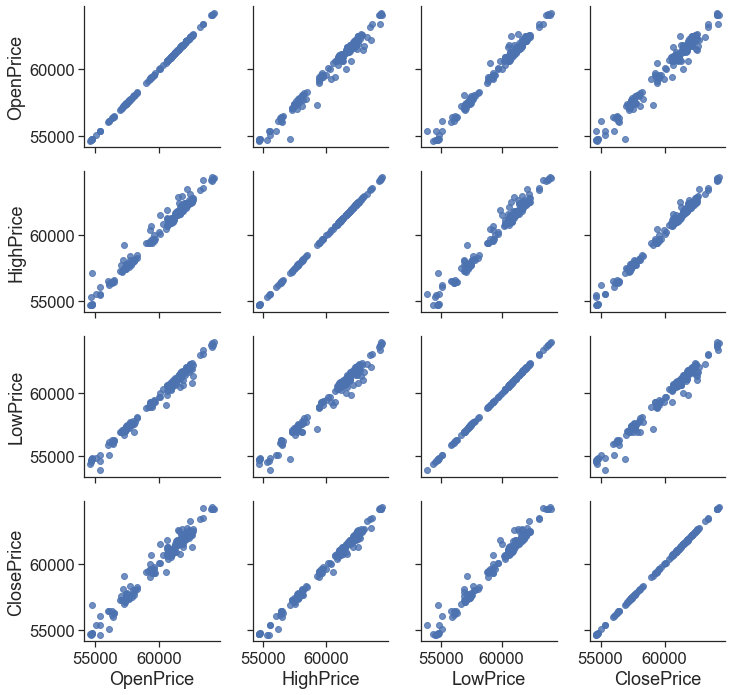

In [18]:
g=sns.PairGrid(btc_usd, vars=['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice'])
g.map(plt.scatter, alpha=0.8)
g.add_legend();

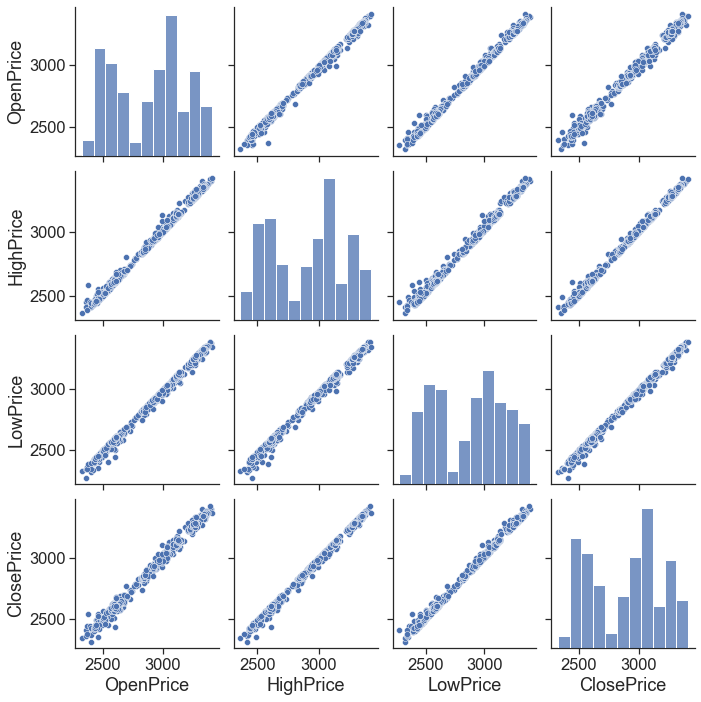

In [19]:
sns.pairplot(data=eth_eur, vars=['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice'])

Importing Bokeh library for interactive analytics

In [20]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [26]:
p1=figure(x_axis_type="datetime", title="Bitcoin Performance in USD", width=900)
p1.grid.grid_line_alpha=0.4
p1.xaxis.axis_label="Date"
p1.yaxis.axis_label="USD Price"

p1.line(btc_usd.index, btc_usd['OpenPrice'], color='#f2a900', legend_label='Bitcoin OpenPrice')
p1.line(btc_usd.index, btc_usd['ClosePrice'], color='#A6CEE3', legend_label= 'Bitcoin ClosePrice')
p1.line(btc_usd.index, btc_usd['HighPrice'], color='#008000', legend_label= 'Bitcoin HighPrice')
p1.line(btc_usd.index, btc_usd['LowPrice'], color='#ff0000',legend_label= 'Bitcoin LowPrice')
p1.legend.location = "top_right"

show(p1)

In [27]:
p2 = figure(x_axis_type="datetime", title="Ethereum Performance in USD", width=900)
p2.grid.grid_line_alpha=0.3
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'

p2.triangle(eth_usd.index, eth_usd['OpenPrice'],size=5, color='#f2a900', legend_label='Ethereum OpenPrice')
p2.square(eth_usd.index, eth_usd['ClosePrice'],size=6 ,color='#A6CEE3', legend_label='Ethereum ClosePrice')
p2.circle(eth_usd.index, eth_usd['HighPrice'],size=7, color='#008000', legend_label='Ethereum HighPrice')
p2.line(eth_usd.index, eth_usd['LowPrice'], color='#ff0000', legend_label='Ethereum LowPrice')
p2.legend.location = "top_right"


show(p2)

Last thirty days Analysis of Bitcoin OpenPrice vs ClosePrice Performance in EUR

In [28]:
p3=figure(x_axis_type="datetime", title="Bitcoin OpenPrice vs ClosePrice Performance in EUR", width=900)
p3.grid.grid_line_alpha=0.4
p3.xaxis.axis_label="Date"
p3.yaxis.axis_label="EUR Price"

p3.circle(btc_eur.index, btc_eur['OpenPrice'],size=10, color='green', alpha=0.2, legend_label='OpenPrice')
p3.line(btc_eur.index, btc_eur['ClosePrice'],color="navy", legend_label='ClosePrice')
show(p3)

Saving the datasets in Excel as .xlsx

In [24]:
writer=pd.ExcelWriter('cryptoUSD.xlsx')
btc_usd.to_excel(writer, sheet_name="BTC")
eth_usd.to_excel(writer, sheet_name="ETH")
writer.save()

In [25]:
writer=pd.ExcelWriter('cryptoEUR.xlsx')
btc_eur.to_excel(writer, sheet_name="BTC")
eth_eur.to_excel(writer, sheet_name="ETH")
writer.save()